In [ ]:
%matplotlib inline
import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

startt, endt = 0,2
startTimeNums = [startt]
endTimeNums = [endt]

casePaths = ['.']

#Liquid phase DNS averaged results in TBFData class (Details in TBFData.py)
PFl1 = Library.TBFData('fl'+str(startt)+'to'+str(endt)+'.npz')
PFl1.setRho(10.0)  
PFl1.setRe_tau(299.410851174619)

#Gas phase DNS averaged results in TBFData class (Details in TBFData.py)
PFg1 = Library.TBFData('fg'+str(startt)+'to'+str(endt)+'.npz')
PFg1.setRho(1.0)
PFg1.setRe_tau(287.7132132596352)

# Results of RANS k-omega-SST model
ko = pd.read_csv('./Twophasedata/damp0.csv')


# Results visualization (Take turbulent kinetic energy for example.)

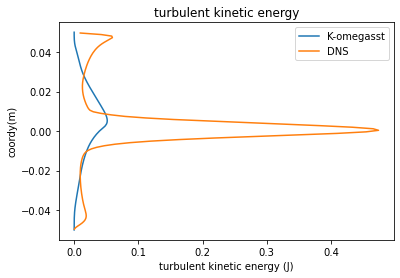

In [7]:
# turbulent kinetic energy of RANS
plt.plot( ko['k'],np.linspace(-0.05,0.05,len(ko['k'])), label='K-omegasst')
# turbulent kinetic energy of DNS
plt.plot( PFl1.fk()+PFg1.fk(),PFl1.y(), label='DNS')

plt.title('turbulent kinetic energy')
plt.xlabel('turbulent kinetic energy (J)')
plt.ylabel('coordy(m)')
plt.legend()
plt.show()

# Plot Lumley triangle

In [5]:
kouxux = np.array(ko['R_0']).reshape(-1,1)
kouyuy = np.array(ko['R_1']).reshape(-1,1)
kouzuz = np.array(ko['R_2']).reshape(-1,1)
kouxuy = np.array(ko['R_3']).reshape(-1,1)
kouxuz = np.array(ko['R_4']).reshape(-1,1)
kouyuz = np.array(ko['R_4']).reshape(-1,1)

DNSuxux = (PFl1.fmsuxux()+PFg1.fmsuxux()).reshape(-1,1)
DNSuyuy = (PFl1.fmsuyuy()+PFg1.fmsuyuy()).reshape(-1,1)
DNSuzuz = (PFl1.fmsuzuz()+PFg1.fmsuzuz()).reshape(-1,1)
DNSuxuy = (PFl1.fmsuxuy()+PFg1.fmsuxuy()).reshape(-1,1)
DNSuxuz = (PFl1.fmsuxuz()+PFg1.fmsuxuz()).reshape(-1,1)
DNSuyuz = (PFl1.fmsuyuz()+PFg1.fmsuyuz()).reshape(-1,1)

kocomponets = np.concatenate((kouxux,kouyuy,kouzuz,kouxuy),axis=1)
DNScomponets = np.concatenate((DNSuxux,DNSuyuy,DNSuzuz,DNSuxuy,DNSuxuz,DNSuyuz),axis=1)
RANS_RST = Library.ReynoldsStressTensor(kocomponets)
DNS_RST = Library.ReynoldsStressTensor(DNScomponets)

Initialize ReynoldsStressTensor using 2D data...
Initialize ReynoldsStressTensor using 3D data...


Plot Lumley triangle finished


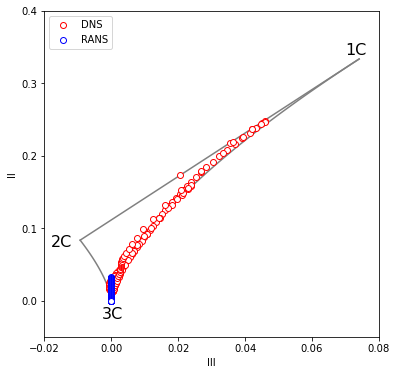

In [8]:
save_fig = 0

# plot template
fig31 = Library.plot_Lumley_tri()

# plot DNS data
DNS_coors = DNS_RST.LumleyTriCoor()
RANS_coors = RANS_RST.LumleyTriCoor()
plt.scatter(DNS_coors[:,0], DNS_coors[:,1], label='DNS', 
            facecolor= 'white', edgecolors='red', linewidths = 1.0, zorder = 3)
plt.scatter(RANS_coors[:,0], RANS_coors[:,1], label='RANS', 
            facecolor= 'white', edgecolors='blue', linewidths = 1.0, zorder = 3)

# figure format
plt.legend(loc='upper left')

if save_fig:
    plt.savefig('a', dpi=300, bbox_inches='tight')
    plt.close()

print('Plot Lumley triangle finished')

# Plot barycentric triangle

Plot barycentric map finished


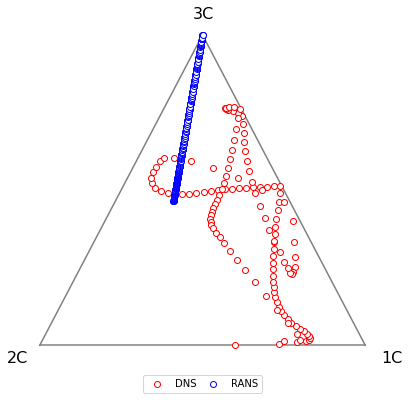

In [10]:
# plot template
fig33 = Library.plot_bary_tri()

# plot DNS data
DNS_coors = DNS_RST.BaryTriCoor()
RANS_coors = RANS_RST.BaryTriCoor()

plt.scatter(DNS_coors[:128,0], DNS_coors[:128,1], label='DNS', 
            facecolor= 'white', edgecolors='red', linewidths = 1.0, zorder = 3)
plt.scatter(RANS_coors[:,0], RANS_coors[:,1], label='RANS', 
            facecolor= 'white', edgecolors='blue', linewidths = 1.0, zorder = 3)


# figure format
plt.legend(loc='lower center', columnspacing=0.7,ncol=2,bbox_to_anchor=(0.5, -0.15))

if save_fig:
    plt.savefig('a', dpi=300, bbox_inches='tight')
    plt.close()

print('Plot barycentric map finished')